In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

from tensorflow.keras.layers import Input, Dense, Reshape, concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [0]:
adam = Adam(lr=2e-4,beta_1=0.5)

In [0]:
noise_size = 30

X = x_train.astype(float) / 255
X_ = x_test.astype(float) / 255

In [0]:
in_noise = Input(shape=(noise_size,))
in_value = Input(shape=(10,))
total_input = concatenate([in_noise, in_value])
dense = Dense(units=100, activation="tanh")(total_input)
dense = Dense(units=400, activation="tanh")(dense)
dense = Dense(units=784, activation="sigmoid")(dense)
out_layer = Reshape(target_shape=(28, 28))(dense)

In [0]:
gen = Model([in_noise, in_value], out_layer)

In [0]:
gen.compile(optimizer=adam, loss="binary_crossentropy")

In [26]:
gen.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 10)]         0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 40)           0           input_13[0][0]                   
                                                                 input_14[0][0]                   
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 100)          4100        concatenate_1[0][0]        

In [0]:
in_layer = Input(shape=(28, 28,))
reshape = Reshape(target_shape=(784,))(in_layer)
dense = Dense(units=400, activation="tanh")(reshape)
dense = Dense(units=100, activation="tanh")(dense)
dense = Dense(units=10, activation="tanh")(dense)
out_real = Dense(units=2, activation="softmax")(dense)
out_value = Dense(units=10, activation="softmax")(dense)

In [0]:
disc = Model(in_layer, [out_real, out_value])

In [0]:
disc.compile(optimizer=adam, loss="categorical_crossentropy")

In [30]:
disc.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
reshape_3 (Reshape)             (None, 784)          0           input_15[0][0]                   
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 400)          314000      reshape_3[0][0]                  
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 100)          40100       dense_11[0][0]                   
____________________________________________________________________________________________

In [0]:
in_noise = Input(shape=(noise_size,))
in_value = Input(shape=(10,))
gen_layer = gen([in_noise, in_value])
disc_layer = disc(gen_layer)

In [0]:
gan = Model([in_noise, in_value], disc_layer)

In [0]:
gan.compile(optimizer=adam, loss="categorical_crossentropy")

In [37]:
gan.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_21 (InputLayer)           [(None, 10)]         0                                            
__________________________________________________________________________________________________
model_4 (Model)                 (None, 28, 28)       358884      input_20[0][0]                   
                                                                 input_21[0][0]                   
__________________________________________________________________________________________________
model_5 (Model)                 [(None, 2), (None, 1 355242      model_4[2][0]              

In [0]:
def display(images):
    plt.figure(figsize=(5, 5))
    for i in range(1, 26):
        plt.subplot(5, 5, i)
        plt.imshow(images[i], cmap="gray")
    plt.show()
   

0


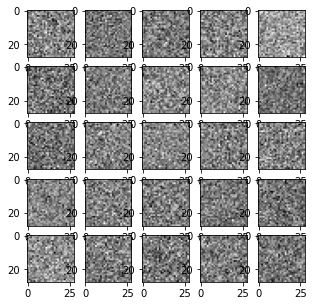

100


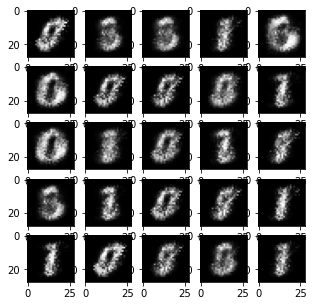

200


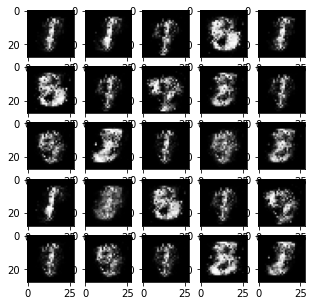

300


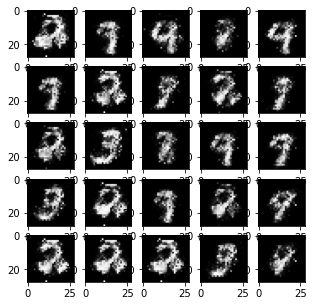

400


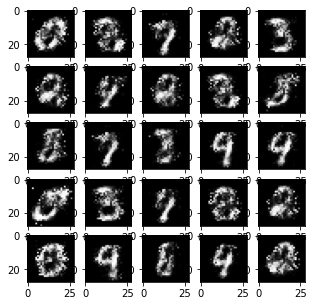

500


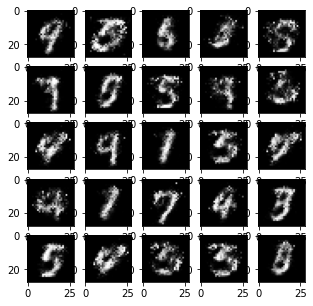

600


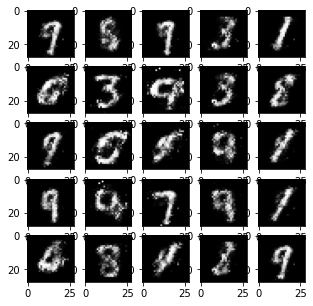

700


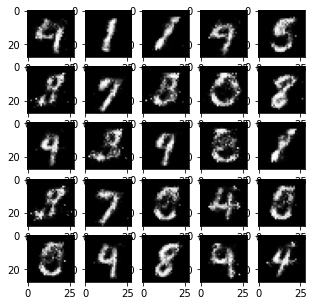

800


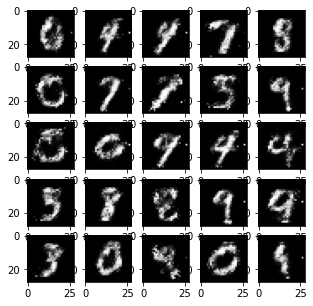

900


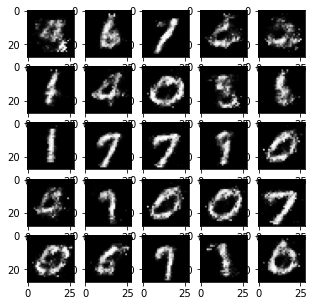

In [17]:
for i in range(1000):
    noise = np.random.randn(10000, noise_size)
    fake_values = to_categorical(np.random.randint(0, 10, 10000), num_classes=10)

    fake_images = gen.predict(noise, fake_values)

    idx = np.random.randint(0, len(X), 1000)
    real_images = X[idx]
    real_values = to_categorical(y_train[idx])

    disc.trainable = True

    disc.fit(fake_images, np.zeros([1000]), verbose=0)
    disc.fit(real_images, np.ones([1000]) * .9, verbose=0)

    disc.trainable = False

    noise = np.random.randn(1000, noise_size)
    gan.fit(noise, np.ones([1000]) * .9, verbose=0)
    
    if i % 100 == 0:
        print(i)
        display(fake_images)



In [0]:
noise = np.random.randn(1000, noise_size)
fake_images = gen.predict(noise)

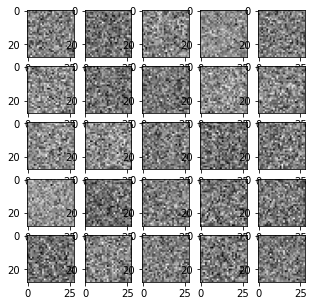

In [17]:
display(fake_images)